In [1]:
from scipy.io.wavfile import read
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import stft

In [2]:
fs, data = read("dolphinsound_20_sec.wav")

In [3]:
ch1 = data[:,0]
ch1 = ch1-np.mean(ch1)

tstart = 15
tend = 18
signal_choose = ch1[tstart*fs:tend*fs]
len(signal_choose)

288000

In [4]:
from IPython.display import Audio
Audio(signal_choose, rate=fs)

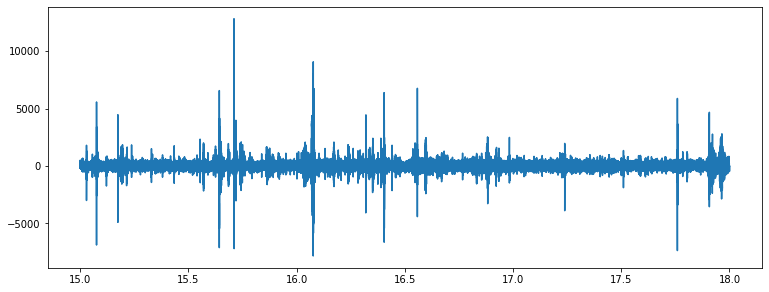

In [20]:
t = np.arange(tstart, tend, 1/fs)
plt.figure(figsize=(6.4*2, 4.8))
plt.plot(t, signal_choose)
plt.show()

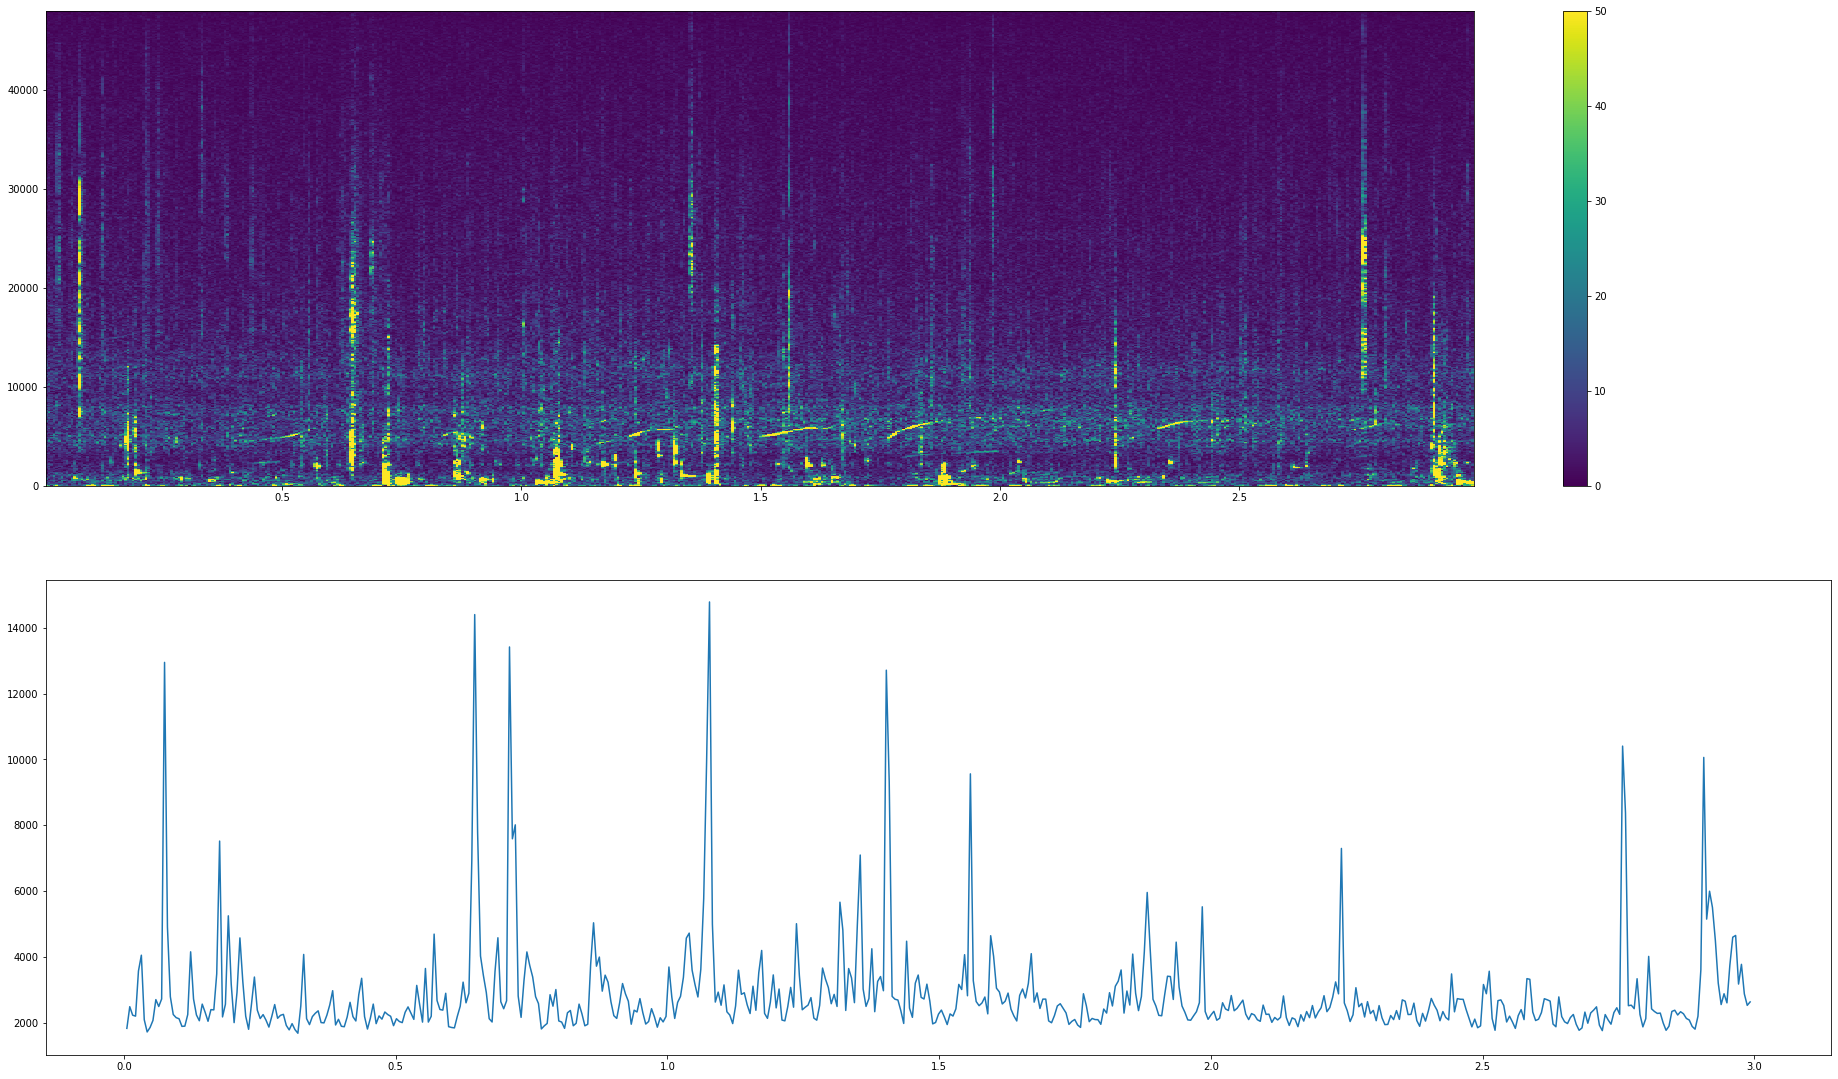

In [6]:
nperseg = 1024
f, t, Zxx = stft(signal_choose, nperseg=nperseg, window='hamming', fs=fs, noverlap=nperseg*0.5, nfft=nperseg, boundary=None, padded=False)
a = np.abs(Zxx)
f_interest = 11000
# f_index = int(f_interest//(fs/nperseg))
f_index = 513
energy = np.sum(a, axis=0)

plt.figure(figsize=(6.4*5, 4.8*4))
plt.subplot(2, 1, 1)
plt.pcolormesh(t, f[:f_index], a[:f_index, :], vmin=0, vmax=50)
plt.colorbar()
plt.subplot(2, 1, 2)
plt.plot(t, energy)
plt.show()

In [ ]:
x_test = signal_choose[0:1024]

In [18]:
Zxx.shape

(513, 561)

In [11]:
signal_choose.shape

(288000,)

In [12]:
(288000-1024)//512+1

561

In [13]:
96000/1024

93.75

In [19]:
561*0.0106666

5.9839626

In [7]:
a.shape

(513, 561)

In [29]:
np.sum(a, axis=1).shape

(513,)

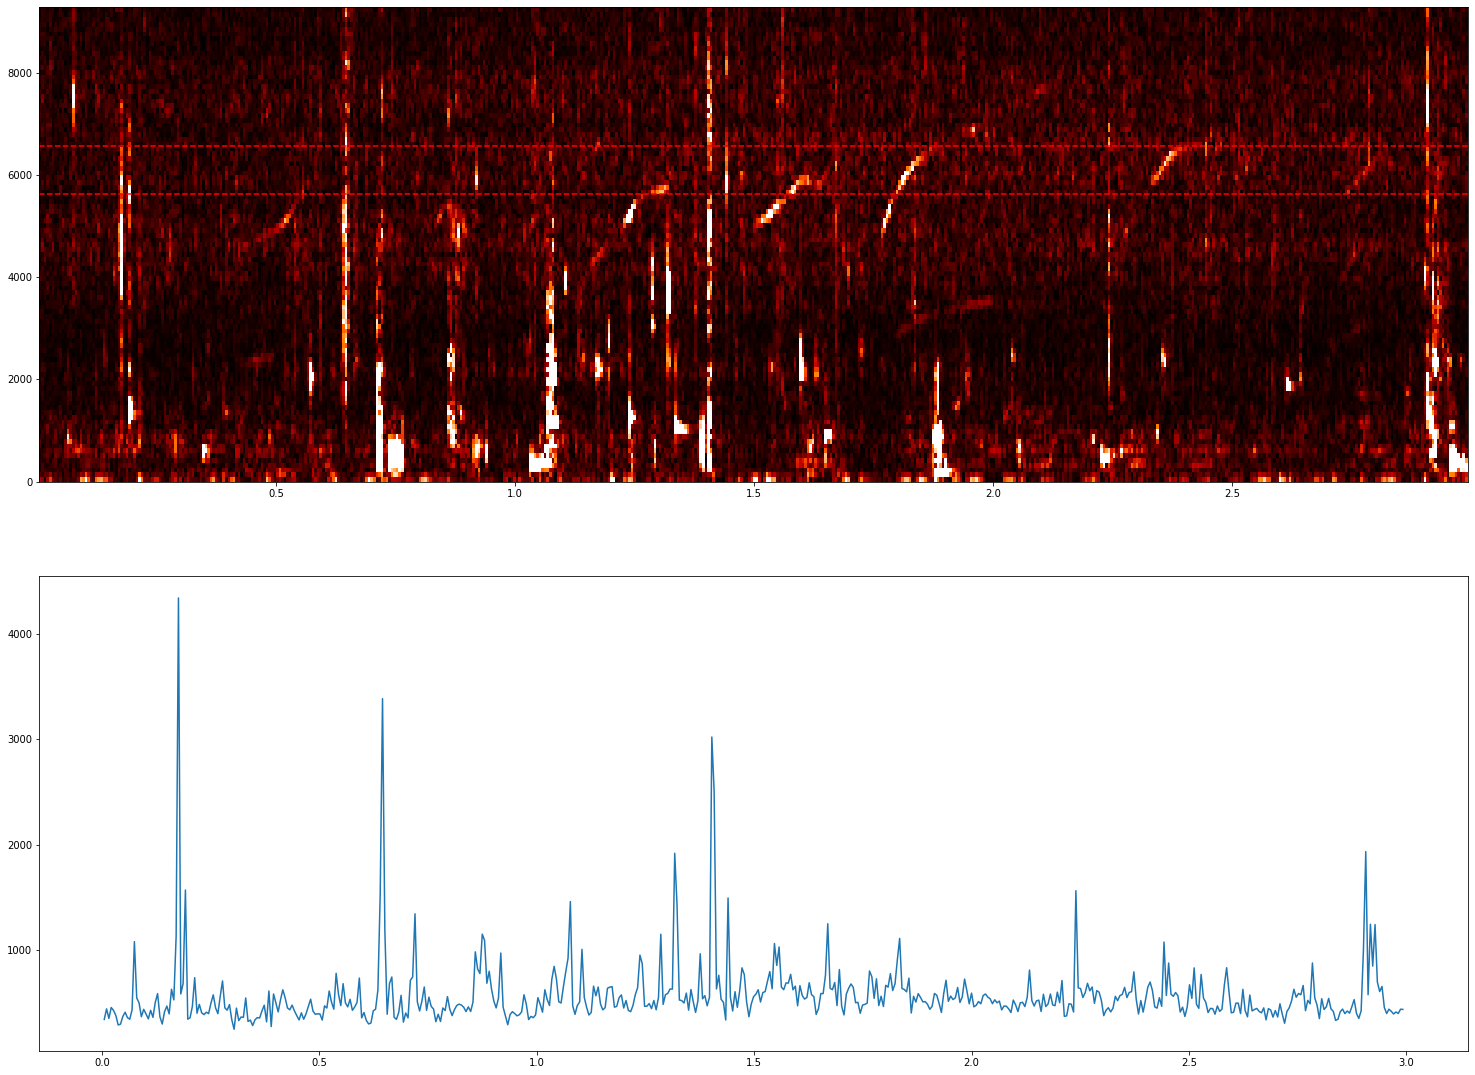

In [30]:
# sum up to the frequency 9937.5
f_down = 40
f_index = 81
energy_cut = np.sum(a[f_down:f_index, :], axis=0)

fg, (ax1, ax2) = plt.subplots(2, 1, sharex='row')
fg.set_size_inches(6.4*4, 4.8*4)
cmap = plt.get_cmap('gist_heat')
ax1.axhline(5625 , color='r', ls='--')
ax1.axhline(6562.5 , color='r', ls='--')
# ax1.axvline( , color='r', ls='--')
ax1.pcolormesh(t, f[:100], a[:100, :], cmap=cmap, vmin=0, vmax=80)

ax2.plot(t, energy_cut)

f[106] = 9937.5,f[107] = 10031.25

In [60]:
f[40]

3750.0

In [71]:
f[50]

4687.5

In [72]:
f[60]

5625.0

In [73]:
f[70]

6562.5

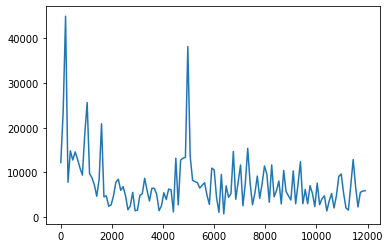

In [86]:
from scipy.fftpack import fft, fftfreq
test = signal_choose[48000:48000+1024]
tk = fft(test)
f = fftfreq(1024, 1/96000)
plt.figure()
plt.plot(f[:128], abs(tk[:128]))
plt.show()

In [8]:
mask = np.ones(len(t))*-1
for index, time in enumerate(t):
    if (time>0.476) and (time<0.5593):
        mask[index] = 1
    elif (time>1.164) and (time<1.314):
        mask[index] = 1
    elif (time>1.5) and (time<1.61):
        mask[index] = 1
    elif (time>1.767) and (time<1.87):
        mask[index] = 1
    elif (time>2.33) and (time<2.38):
        mask[index] = 1
    elif (time>2.74) and (time<2.79):
        mask[index] = 1
mask = np.array(mask)
mask = np.expand_dims(mask, axis=1)   

In [9]:
data = []
for i in range(a.shape[1]):
    data.append(a[:, i])
data = np.array(data)

In [10]:
# data.shape
mask.shape

(561, 1)

In [11]:
feature = np.concatenate((data, mask), axis=1)
feature.shape

(561, 514)

In [12]:
import pandas as pd
feature_df= pd.DataFrame(feature)

In [13]:
feature_df

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,38.018185,14.886484,7.271428,5.780452,9.382858,3.275616,6.710864,17.453395,17.926204,9.227343,...,1.907308,0.428552,1.115790,0.589450,0.293345,0.953918,0.671292,0.380338,0.036355,-1.0
1,30.089348,9.238268,13.851013,14.873197,7.055786,9.523972,7.361205,1.045307,7.295011,11.571385,...,0.422778,1.326629,0.242414,1.671988,1.619211,0.855058,0.725617,0.285153,0.406000,-1.0
2,2.974420,20.701165,8.255120,6.591042,5.611984,14.716855,9.176513,7.521528,4.928107,5.484371,...,0.674219,0.806255,1.090534,0.998355,0.998213,0.913323,0.714591,0.384413,1.087863,-1.0
3,34.019497,16.940975,9.237482,6.098607,13.289624,18.108707,16.989663,10.083086,11.997081,10.481338,...,1.402486,1.059025,0.682310,0.626560,0.100276,0.386398,0.447282,0.995475,1.875427,-1.0
4,49.173734,29.421280,8.916438,9.367202,2.201187,9.285181,15.924036,5.367879,4.309736,10.542767,...,1.696535,1.095069,0.923326,1.332826,0.207887,0.729242,0.839692,0.286798,0.717223,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,32.992006,29.955935,31.392522,395.895953,479.575693,111.598119,17.884521,12.954670,27.829121,11.903511,...,1.025545,1.506206,0.325652,0.920542,0.615042,0.842715,1.066493,1.412911,1.600590,-1.0
557,29.309069,29.810073,139.755463,311.683536,154.794776,33.322813,11.885094,7.521319,8.444408,8.223386,...,1.929599,1.584989,1.729925,1.928622,1.383008,0.384993,0.781331,0.313286,0.316696,-1.0
558,31.610304,37.803432,60.821434,225.427337,190.473384,68.469115,31.489895,21.124644,14.747586,7.855191,...,0.386137,1.311292,1.322948,1.319736,1.068384,0.509290,0.989678,1.071005,0.921090,-1.0
559,46.920538,41.055008,90.500817,180.738107,51.107448,12.466655,26.607268,10.398178,9.458048,15.155099,...,1.374720,1.069079,0.492652,0.398447,0.615146,0.305047,0.509900,1.137721,1.207424,-1.0


In [14]:
pd.DataFrame.to_csv(feature_df, 'freq_features.csv')